# Linear Regression (univariate)

#### Problem statement: Suppose you are the CEO of a restaurant franchise and are considering diﬀerent cities for opening a new outlet. The chain already has trucks in various cities and you have data for proﬁts and populations from the cities. You would like to use this data to help you select which city to expand to next. 


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import Math,display
# %matplotlib notebook
# %matplotlib notebook
%matplotlib inline

In [88]:
df = pd.read_csv('C:\\Users\\divye\\Desktop\\mlA\\machine-learning-ex1completed\\ex1\\ex1data1.txt',
                 names=['Population','Profit'])

In [89]:
X = df.Population
y = df.Profit
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0, 0.5, 'Profit in $10,000')

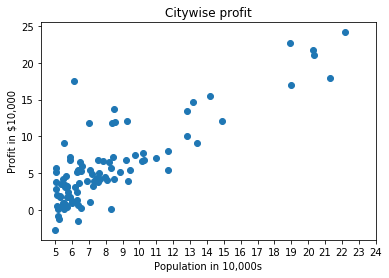

In [90]:
# plotting raw data
#plt.figure(figsize = (10,6))
plt.plot(X,y,'o')
plt.title('Citywise profit')
plt.xticks(np.arange(5,25))
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000')

In [91]:
# Gradient Descent

# Create a 97x2 dimension matrix with ones and population
# 1st column is a vector of ones and next is Population
# ones is added for matrix to be multiplyable by 2x1 theta vector
# X_ and y_ are created for easy Linear algebra implementation

X_ = np.ones([len(X),2])
y_ = np.ones([len(X),1])
for i in range(len(X)):
    X_[i,1] = X[i]
    y_[i] = y[i]
theta = np.array([[0],[0]])



In [92]:
from sympy.abc import i

display(Math('\\text{Cost Function for linear regression\n}'))
display(Math('J(\\theta_0,\\theta_1)=\\frac{%s}{2m}\\sum_{i=1}^{m}(h_{\\theta}(x^{(i)}-y^{(i)})^{2}'%(1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [93]:
epochs = 1500
alpha = 0.01    # learning rate


def compute_cost(X_,y_,theta):
    '''
    Computes cost for linear regression
    theta = 2x1 vector
    Returns cost for provided theta vector
    '''
    
    m = len(y_)
    J = (1/(2*m))*sum((X_@theta - y_)**2);
    return J

cf1 = compute_cost(X_,y_,theta)

display(Math('\\text{Cost: }J(%s,%s) = %g'%(0,0,cf1)))

<IPython.core.display.Math object>

array([[-3.63029144],
       [ 1.16636235]])

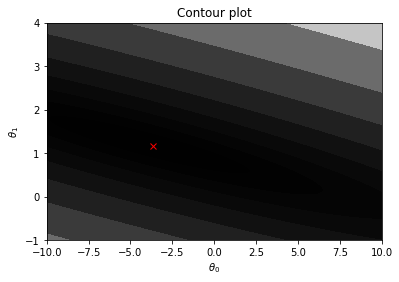

In [94]:
# Gradient Descent

def gradient_descent(X_, y_, theta, alpha, epochs):
    '''
    Performs Gradient Descent to optimize parameters theta0 and theta1
    '''
    #J_history = np.zeros([epochs,1])
    
    m = len(X_)
    for i in range(epochs):
        
        h =  X_@theta
        theta = theta - (alpha/m)*(((h-y_).T)@X_).T
        
    
    ###################################################
    # Code for Plotting
    theta0_vals = np.linspace(-10,10,100)
    theta1_vals = np.linspace(-1, 4, 100)

    J_vals = np.zeros([len(theta0_vals), len(theta1_vals)])
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = [[theta0_vals[i]], [theta1_vals[j]]]
            J_vals[[i],[j]] = compute_cost(X_,y_,t)
    J_vals = J_vals.T
    fig,ax = plt.subplots(1,1)
    cp = ax.contourf(theta0_vals, theta1_vals,J_vals,np.logspace(-2, 3, 20),cmap='gray')
    plt.xlabel('$\\theta_0$')
    plt.ylabel('$\\theta_1$')
    plt.title('Contour plot')
    contour = plt.plot(theta[0],theta[1],'rx')
        
        
    return theta
    
theta_test = np.array([[0],[0]]) # start with random values
theta = gradient_descent(X_, y_,theta_test,alpha, epochs)
theta

In [95]:
theta[0]

array([-3.63029144])

In [96]:
print('Values of theta found after gradient descent')
display(Math('\\theta_0={%g}'%(theta[0])))
display(Math('\\theta_1={%g} ' %(theta[1])))

Values of theta found after gradient descent


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0, 0.5, 'Profit in $10,000')

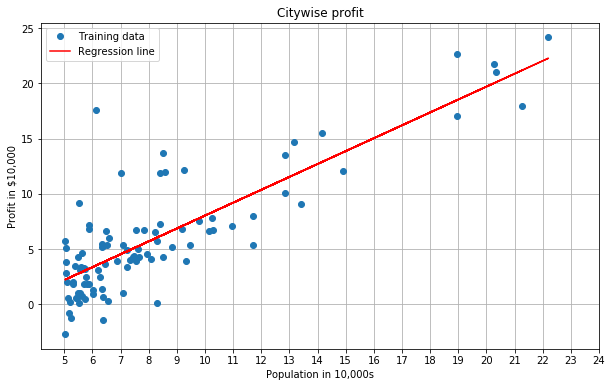

In [97]:
plt.figure(figsize = (10,6))
plt.plot(X,y,'o',label='Training data')
plt.plot(X,theta[1]*X+theta[0],'r-',label='Regression line')
plt.title('Citywise profit')
plt.legend()
plt.grid()
plt.xticks(np.arange(5,25))
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000')

In [103]:
# predicting for value x

x = 10  # Population = 100,000
pred = ([1,x]@theta) [0]*10000
pred

80333.32063951461

In [104]:
print(f' For a population of {x}0,000 we predict a profit of ${np.round(pred,2)}')

 For a population of 100,000 we predict a profit of $80333.32


#### Made by: Divyesh Jolapara
<i>***The data, problem statement and methodology has been used from Stanford University's course of machine learning on Coursera by Andrew NG</i>